In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as smf

### <font color='red'>Problem Statement
Delivery_time -> Predict delivery time using sorting time 

In [28]:
df = pd.read_csv('delivery_time.csv')

In [29]:
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [30]:
df = df.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)

In [31]:
df

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [32]:
#checking null values
df.isnull().sum()

Delivery_time    0
Sorting_time     0
dtype: int64

##### no null values

In [33]:
#checking correlation
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


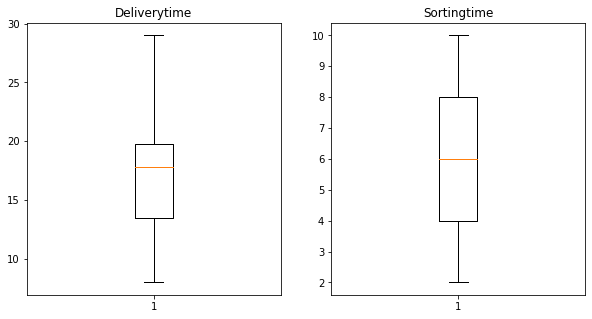

In [34]:
#checking up outliers using boxplot
plt.subplots(figsize=(10,5))
plt.subplot(121)
plt.boxplot(x=df['Delivery_time'])
plt.title('Deliverytime')
plt.subplot(122)
plt.boxplot(x=df['Sorting_time'])
plt.title('Sortingtime')
plt.show()

##### No outliers

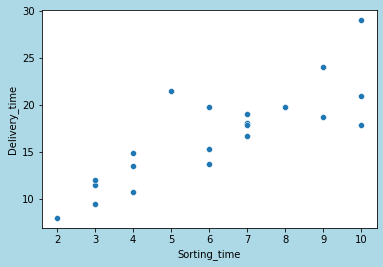

In [35]:
# Checking homoscedasticity
plt.subplots(figsize=(6,4),facecolor='lightblue')
sns.scatterplot(x=df['Sorting_time'],y=df['Delivery_time'])
plt.show()

#### from above figure we can say that the variance has been increased with increasing sorting time we can't say it is homoscedasticity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Before log transformation')

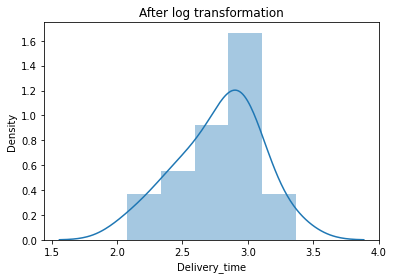

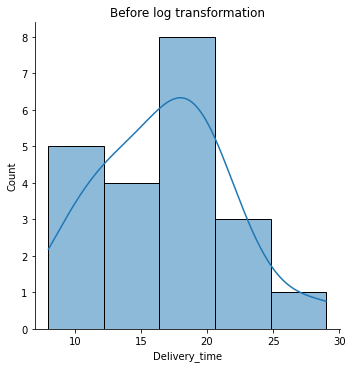

In [36]:
# Applying log-normal distribution
sns.distplot(np.log(df['Delivery_time']),bins=5,kde=True)
plt.title('After log transformation')
sns.displot(df['Delivery_time'],bins=5,kde=True)
plt.title('Before log transformation')

##### As we can see that the values has been scaled down after log transformation in which the data undergoes normality

Text(0.5, 1.0, 'Cube root transformation')

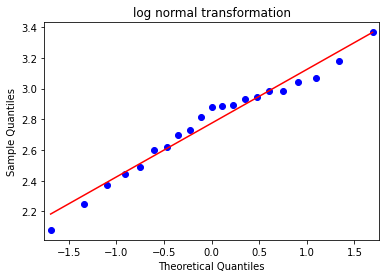

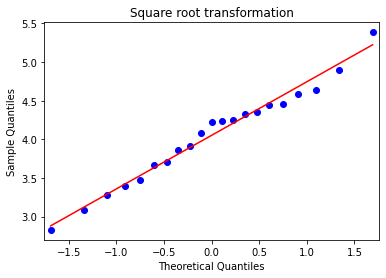

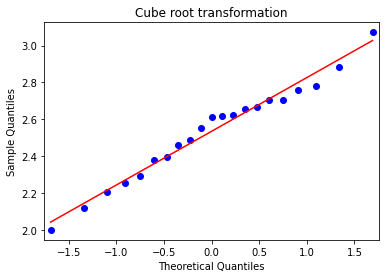

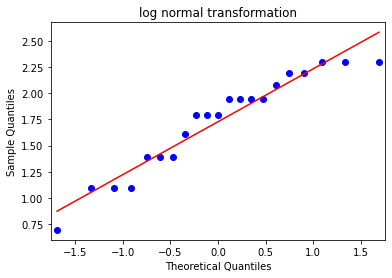

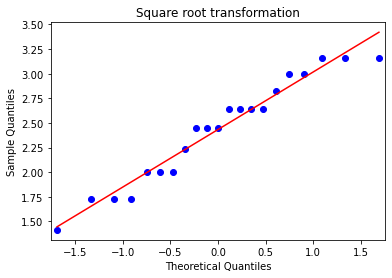

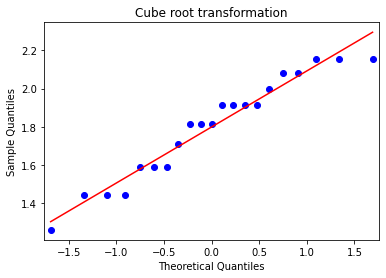

In [41]:
#plotting Q-Q plot for chekcing normality
smf.qqplot(np.log(df['Delivery_time']),line= 'r')
plt.title('log normal transformation')
smf.qqplot(np.sqrt(df['Delivery_time']),line='r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery_time']),line='r')
plt.title('Cube root transformation')
smf.qqplot(np.log(df['Sorting_time']),line= 'r')
plt.title('log normal transformation')
smf.qqplot(np.sqrt(df['Sorting_time']),line='r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Sorting_time']),line='r')
plt.title('Cube root transformation')

#### Model Building

##### the OLS method finds the best-fit line for the data by minimizing the sum of squared errors or residuals between the actual and predicted values.

In [42]:
import statsmodels.formula.api as sm

In [43]:
model = sm.ols("Delivery_time~Sorting_time",data=df).fit()

In [44]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [45]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Model prediction

In [46]:
#y=b1x + b0(doing manually)
delivery_time= 6.582 + 1.649*(5)#sorting time
delivery_time

14.827000000000002

In [67]:
# Automatic Prediction for example sorting time 10,5,6,4
new_data= [10,5,6,4]


In [68]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,10
1,5
2,6
3,4


In [69]:
model.predict(data_pred)


0    23.072933
1    14.827833
2    16.476853
3    13.178814
dtype: float64